# Clifford attractors with Datashader, Panel, and interact

[Datashader](http://datashader.org) renders data into images. 
[Clifford attractors](https://anaconda.org/jbednar/clifford_attractor/notebook) are a type of iterative equation that traces the path of a particle through a 2D space using functions of sine and cosine terms that make interesting "attractor" patterns (covering only some portions of the possible space, in certain shapes). Here we use Numpy and Pandas to calculate a dataframe consisting of ten million such locations, using Numba to make it 50X faster than bare Python. You can run this code yourself if you make a [conda](http://conda.pydata.org/miniconda.html) environment and run `conda install -c pyviz pyviz` first, then update to the GitHub master of [Panel](https://github.com/pyviz/panel) and [Param](https://github.com/ioam/param).

In [ ]:
import numpy as np, pandas as pd
from numba import jit

@jit
def clifford_trajectory(a, b, c, d, x0, y0, n):
    xs, ys = np.zeros(n), np.zeros(n)
    xs[0], ys[0] = x0, y0
    for i in np.arange(n-1):
        xs[i+1] = np.sin(a * ys[i]) + c * np.cos(a * xs[i])
        ys[i+1] = np.sin(b * xs[i]) + d * np.cos(b * ys[i])
    return pd.DataFrame(dict(x=xs,y=ys))

We can visualize the resulting dataframe using [Datashader](http://datashader.org), with colormaps from [Colorcet](http://colorcet.pyviz.org) and interactive widgets from [Panel](http://panel.pyviz.org):

In [ ]:
import datashader as ds
from datashader import transfer_functions as tf

from colorcet import palette_n
ps ={k:p[::-1] for k,p in palette_n.items()}

import panel as pn
pn.extension()

def clifford_plot(a=1.7, b=1.7, c=0.6, d=1.2, n=2000000, colormap=ps['kbc']):
    cvs = ds.Canvas(plot_width=600, plot_height=600)
    agg = cvs.points(clifford_trajectory(a, b, c, d, 0, 0, n), 'x', 'y')
    return tf.shade(agg, cmap=colormap)

In [ ]:
clifford_plot(a=1.7, b=1.7, c=0.6, d=1.2, n=2000000, colormap=ps['kbc'])

In [ ]:
pn.interact(clifford_plot, n=(1,20000000), colormap=ps)

Here `interact()` returns an object that lets us vary the arguments to the given function interactively and see the results.  This object is actually a full `Panel` object, and so we can add other viewable objects to this panel if we like.  For instance, let's define an object `i` that's the same as above but with a PNG logo and a description:

In [ ]:
i=pn.interact(clifford_plot, a=(-2,2), b=(-2,2), c=(-2,2), d=(-2,2), 
              n=(1,20000000), colormap=ps, panel_layout=pn.Row)

logo = "https://tinyurl.com/y9c2zn65/logo_stacked_s.png"

text = """
<H4>Use the widgets to vary the parameters of this 
<a href="https://anaconda.org/jbednar/clifford_attractor">Clifford attractor</a>.
<br><br>Note that many values result in nearly blank plots that contain only 
a few scattered points.</H4>"""

print(pn.__version__)

pn.Row(pn.Column(logo, text, i[0]), i[1]).servable()

Here we could display the new object `i` here in the notebook by removing the semicolon. Instead, we've called `i.servable()` to declare that if someone later runs Bokeh Server on this notebook (using `panel serve --show DatashaderCliffordInteract.ipynb`), your browser will open a separate window like the following, ready to explore or share:

In [ ]:
#! panel serve --show --port 5009 DatashaderCliffordInteract.ipynb

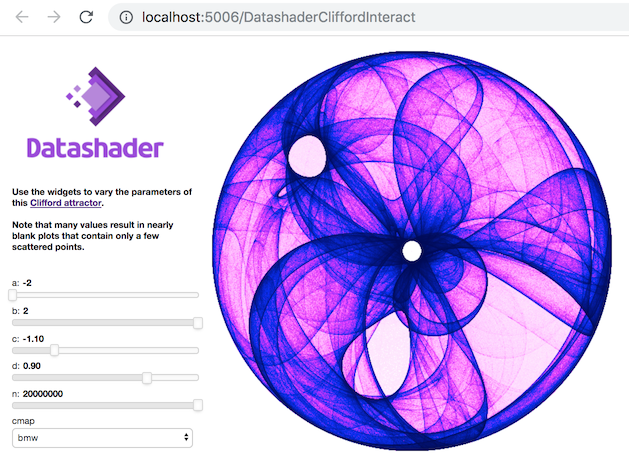